# Section 2.3: Advanced spectrum considerations for sample covariances

This page contains simulations in Section 2.3.

## Contents

    - Section 2.3.1 Limiting spectrum (part 1): Theorem 2.9
    - Section 2.3.1 Limiting spectrum (part 2): variable change to relate $supp(\nu)$ and $supp(\mu)$
    - Section 2.3.2 "No eigenvalue outside the support" (Theorem 2.10)
    - FUNCTIONS

## Section 2.3.1 Limiting spectrum (part 1): Theorem 2.9

Study of the support of (the limiting spectrum of) sample covariance matrix $\frac1n C^{\frac12} Z Z^T C ^{\frac12}$ as well as its connection to the functional inverse.

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
pi = np.pi

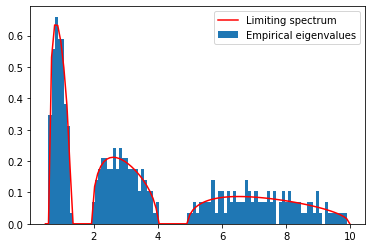

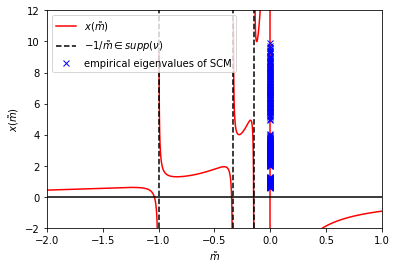

In [127]:
coeff = 3
p = 100*coeff
n = 1000*coeff
c = p/n

eig_C = [1,3,7]
cs = [1/3,1/3,1/3]
eigs_C = np.concatenate([eig_C[0]*np.ones(int(p*cs[0])),eig_C[1]*np.ones(int(p*cs[1])),eig_C[2]*np.ones(int(p*cs[2]))])
C = np.mat(np.diag(eigs_C)) # population covariance

Z = np.mat(np.random.randn(p,n))
X = scipy.linalg.sqrtm(C) @ Z

SCM = X @ X.T/n # sample covariance matrix and its empirical spectral measure
eigs_SCM = np.linalg.eig(SCM)[0]
edges=np.linspace(np.min(eigs_SCM)-.1,np.max(eigs_SCM)+.1,100)

y  = 1e-5
zs = edges+y*1j
mu = []

tilde_m=0
for z in zs:

    tilde_m_tmp=-1
    while abs(tilde_m-tilde_m_tmp)>1e-6:
        tilde_m_tmp=tilde_m
        tilde_m = 1/( -z + 1/n*np.sum(eigs_C/(1+tilde_m*eigs_C)) )

    m = tilde_m/c+(1-c)/(c*z)
    mu.append(np.imag(m)/pi)

plt.hist(eigs_SCM,bins=edges,weights=1/p/(edges[1]-edges[0])*np.ones(p),label='Empirical eigenvalues')
plt.plot(edges,mu,'r',label='Limiting spectrum')
_ = plt.legend()

# functional inverse
# calling SCM_func_inv(tilde_m, eigs_C, cs, c) defined at the end of script
x = lambda tilde_m : SCM_func_inv(tilde_m, eig_C, cs, c)[0]

tilde_ms = np.linspace(-2+1e-3,1+1e-3,1000)

for lambda_ in np.append(eig_C,1e-6):
    tol = 1e-3
    tilde_ms[ [i for i in range(len(tilde_ms)) if tilde_ms[i]<=-1/lambda_+tol and tilde_ms[i]>=-1/lambda_-tol] ]=np.nan
    
# corresponds to Figure 2.4
plt.figure()
plt.plot(tilde_ms, [ x(m) for m in tilde_ms ],'r',label=r'$x(\tilde m)$')
plt.axvline(x=-1/eig_C[0],c='k',ls='--',label=r'$-1/\tilde m \in supp(\nu)$')
plt.axvline(x=-1/eig_C[1],c='k',ls='--')
plt.axvline(x=-1/eig_C[2],c='k',ls='--')
plt.axhline(y=0,c='k')

plt.plot(np.zeros(p),eigs_SCM,'xb',label='empirical eigenvalues of SCM')

plt.gca().set_xlim(-2,1)
plt.gca().set_ylim(-2,12) # set different axis limits, to see for instance when tilde_m >0
plt.xlabel(r'$\tilde m$')
plt.ylabel(r'$x(\tilde m)$')
_ = plt.legend()

## Section 2.3.1 Limiting spectrum (part 2): variable change to relate $supp(\nu)$ and $supp(\mu)$

study of the function $\gamma(\cdot)$ that maps $z(\tilde m)$ to $-\frac1{\tilde m}$ and in particular, the exclusion region that cannot be reached by 

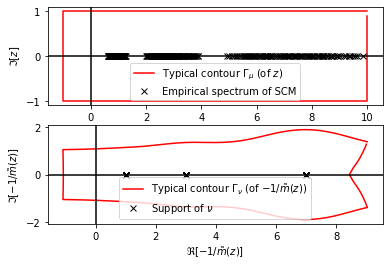

In [101]:
coeff = 3
p = 100*coeff
n = 1000*coeff
# p = 200*coeff
# n = 100*coeff
c = p/n

eigs_C = np.concatenate([eig_C[0]*np.ones(p//3),eig_C[1]*np.ones(p//3),eig_C[2]*np.ones(p//3)])
C = np.mat(np.diag(eigs_C)) # population covariance
Z = np.mat(np.random.randn(p,n))
X = scipy.linalg.sqrtm(C) @ Z
SCM = X@X.T/n
eigs_SCM = np.linalg.eig(SCM)[0]

y_min = -1
y_max = 1
x_min = -1
x_max = 10
# x_max = 30

zs1 = np.arange(x_max,x_min,-.1) + y_max*1j
zs2 = x_min + np.arange(y_max,y_min,-.1)*1j
zs3 = np.arange(x_min,x_max,.1) + y_min*1j
zs4 = x_max + np.arange(y_min,y_max,.1)*1j

zs = np.concatenate([zs1, zs2, zs3, zs4]) # contour Gamma_mu circling around the (limiting) support mu
gamma_zs = []

tilde_m=0
for z in zs:
    
    tilde_m_tmp=-1
    while abs(tilde_m-tilde_m_tmp)>1e-6:
        tilde_m_tmp=tilde_m
        tilde_m = 1/( -z + 1/n*np.sum(eigs_C/(1+tilde_m*eigs_C)) )
        
    gamma_zs.append(-1/tilde_m)

plt.subplot(2,1,1)
plt.plot(np.real(zs),np.imag(zs),'r',label=r'Typical contour $\Gamma_\mu$ (of $z$)')
plt.plot(eigs_SCM,np.zeros(p),'xk',label='Empirical spectrum of SCM')
plt.axvline(x=0,c='k')
plt.axhline(y=0,c='k')
plt.xlim=[-2,11]
#plt.xlim=[-2,30]
plt.ylim=[-2, 2]

plt.xlabel(r'$\Re[z]$')
plt.ylabel(r'$\Im[z]$')
_ = plt.legend()

plt.subplot(2,1,2)
plt.plot(np.real(gamma_zs),np.imag(gamma_zs), 'r',label=r'Typical contour $\Gamma_\nu$ (of $-1/\tilde m(z)$)')
plt.plot(eigs_C,np.zeros(p),'xk',label=r'Support of $\nu$')
plt.axvline(x=0,c='k')
plt.axhline(y=0,c='k')
plt.xlim=[-2,11]
plt.ylim=[-2, 2]
#plt.xlim=[-5,25]
#plt.ylim=[-6,6]

plt.xlabel(r'$\Re[-1/\tilde m(z)]$')
plt.ylabel(r'$\Im[-1/\tilde m(z)]$')
_ = plt.legend()

## Section 2.3.2 "No eigenvalue outside the support" (Theorem 2.10)

Study the behavior of SCM eigenvalues that possibly "escapes" from the limiting support 

Text(0.5, 1.0, 'Student-t SCM')

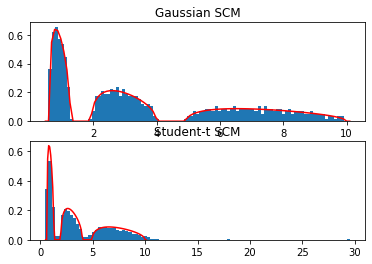

In [137]:
coeff = 6
p = 100*coeff
n = 1000*coeff
c = p/n

eig_C = [1,3,7]
eigs_C = np.concatenate([eig_C[0]*np.ones(p//3),eig_C[1]*np.ones(p//3),eig_C[2]*np.ones(p//3)])
C = np.mat(np.diag(eigs_C)) # population covariance

nu_student = 3; # degrees of freedom nu of Student's t distribution

Z1 = np.mat(np.random.randn(p,n))
Z2 = np.mat(np.random.standard_t(nu_student,(p,n)))/np.sqrt(nu_student/(nu_student-2))

X1 = scipy.linalg.sqrtm(C) @ Z1
X2 = scipy.linalg.sqrtm(C) @ Z2

SCM1 = X1@(X1.T)/n # Gaussian SCM
SCM2 = X2@(X2.T)/n # Student-t SCM
eigs_SCM1 = np.linalg.eig(SCM1)[0]
eigs_SCM2 = np.linalg.eig(SCM2)[0]
edges1=np.linspace(np.min(eigs_SCM1)-.1,np.max(eigs_SCM1)+.2,100)
edges2=np.linspace(np.min(eigs_SCM2)-.1,np.max(eigs_SCM2)+.2,100)

y = 1e-5
zs = edges1+y*1j
mu = []

tilde_m=0
for z in zs:

    tilde_m_tmp=-1
    while abs(tilde_m-tilde_m_tmp)>1e-6:
        tilde_m_tmp=tilde_m
        tilde_m = 1/( -z + 1/n*np.sum(eigs_C/(1+tilde_m*eigs_C)) )

    m = tilde_m/c+(1-c)/(c*z)
    mu.append(np.imag(m)/pi)

plt.subplot(2,1,1)
plt.hist(eigs_SCM1,bins=edges1,weights=1/p/(edges1[1]-edges1[0])*np.ones(p),label='Empirical eigenvalues')
plt.plot(edges1,mu,'r',label='Limiting spectrum')
plt.title('Gaussian SCM')

plt.subplot(2,1,2)
plt.hist(eigs_SCM2,bins=edges2,weights=1/p/(edges2[1]-edges2[0])*np.ones(p),label='Empirical eigenvalues')
plt.plot(edges1,mu,'r',label='Limiting spectrum')
_ = plt.title('Student-t SCM')

## FUNCTIONS

In [138]:
def SCM_func_inv(tilde_m, eig_C, cs, c):
#SCM_func_inv functional inverse of Stieltjes transform of large sample covariance model
#   INPUT: Stieltjes transform tilde_m, (k-discrete) eigenvalues of C (or nu), vector cs=p_a/p for a=1,...k, ratio c=p/n
#   OUTPUT: functional inverse x (of tilde_m) and its first derivative x_d

    assert len(eig_C) == len(cs),'Error: nb of (discrete) eigenvalues and nb of classes not equal!'

    x = -1/tilde_m
    x_d = 1/(tilde_m ** 2)

    for a in range(len(cs)):
        x   = x   + c*cs[a]*eig_C[a]/(1+eig_C[a]*tilde_m)
        x_d = x_d - c*cs[a]*eig_C[a]**2/(1+eig_C[a]*tilde_m)**2

    return x,x_d